In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import math 
from ast import literal_eval
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp  /content/drive/MyDrive/Updated_Dateset_v5.zip /content/

In [ ]:
!unzip  Updated_Dateset_v5.zip

Archive:  Updated_Dateset_v5.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [ ]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
#df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.unknown.0.key',
       'data.http.result.response.headers.unknown.0.value.0',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.unknown.1.key',
       'data.http.result.response.headers.unknown.1.value.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
   

In [ ]:
renameDict = {
       'data.http.result.response.headers.server.0':'data.http.result.response.headers.server',
       'data.http.result.response.headers.connection.0':'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via.0':'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges.0': 'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control.0':'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after.0':'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type.0':'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location.0': 'data.http.result.response.headers.location',
       'data.http.result.redirect_response_chain.0.status_line':'data.http.result.redirect_response_chain.status_line',
       'data.http.result.response.headers.etag.0':'data.http.result.response.headers.etag',
       'data.http.result.response.headers.last_modified.0':'data.http.result.response.headers.last_modified',
       'data.http.result.response.headers.vary.0':'data.http.result.response.headers.vary',
       'data.http.result.response.transfer_encoding.0': 'data.http.result.response.transfer_encoding',
       'data.http.result.response.headers.x_powered_by.0':'data.http.result.response.headers.x_powered_by',
       'data.http.result.response.headers.pragma.0':'data.http.result.response.headers.pragma',
       'data.http.result.redirect_response_chain.0.headers.server.0':'data.http.result.redirect_response_chain.headers.server'
}

In [ ]:
df.rename(columns=renameDict, errors="raise",inplace=True)

In [ ]:
catfields = [ 'netType', 
              #'Organization',
              'data.http.result.response.headers.server',
               'data.http.result.response.status_code',
              'data.http.result.response.headers.connection',
              'data.http.result.response.headers.via',
              'data.http.result.response.headers.accept_ranges',
              'data.http.result.response.headers.cache_control',
              'data.http.result.response.headers.retry_after',
             # 'data.http.result.response.body',
             # 'data.http.result.response.body_sha256',
              'data.http.result.response.headers.content_type',
              'data.http.result.response.headers.location',
             # 'data.http.result.redirect_response_chain.status_line',
              'data.http.result.response.headers.etag',
              #'data.http.result.response.headers.vary',
              #'data.http.result.response.transfer_encoding',
             # 'data.http.result.response.headers.x_powered_by',
              #'data.http.result.response.headers.pragma',
              'as_name', 'as_no',
              'data.tls.status',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization',
              'vendor'
       ]

In [ ]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

def getgeneralphp(x):
  if (pd.isna(x)):
    return -1
  else:
    if('PHP' in x):
      return 'PHP'

def changenullaszero(x):
  if (pd.isna(x)): 
    return -1
  else:
    return 1

def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

def arrayLiteral(stringarray):
  if(pd.isna(stringarray)):
     return 0
  return len(literal_eval(stringarray))

def removeSquareBrackets(text):
  if(pd.isna(text)):
     return -1
  return literal_eval(text)[0];

def featureImportance(clf):
  importance = clf.feature_importances_
  importancelist = []
  for i,v in enumerate(importance):
    importancelist.append([df.columns[i],v])
  importantdf = pd.DataFrame(importancelist)
  importantdf.columns = ['Feature','Importance']
  ax = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(10,20))

In [ ]:
df['data.http.result.response.headers.retry_after'].value_counts()

0.0        5081
86400.0      16
3600.0       12
5.0          10
300.0         5
600.0         1
84600.0       1
900.0         1
Name: data.http.result.response.headers.retry_after, dtype: int64

In [ ]:
#df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(changenullaszero)
df['data.http.result.response.headers.via'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location'] = df['data.http.result.response.headers.location'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag'] = df['data.http.result.response.headers.etag'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified']  = df['data.http.result.response.headers.last_modified'].apply(changenullaszero)
df['data.http.result.response.headers.vary'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by']  = df['data.http.result.response.headers.x_powered_by'].apply(getgeneralphp)
#df['data.http.result.response.headers.x_powered_by'].fillna(-1, inplace=True)

df['data.http.result.response.headers.server']  = df['data.http.result.response.headers.server'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server'].fillna(-1, inplace=True)

In [ ]:
# df['data.http.result.response.headers.server'] = le.fit_transform(df['data.http.result.response.headers.server'].astype(str))
# df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
# df['data.http.result.response.headers.connection'] = le.fit_transform(df['data.http.result.response.headers.connection'].astype(str))
# df['data.http.result.response.headers.via'] = le.fit_transform(df['data.http.result.response.headers.via'].astype(str))
# df['data.http.result.response.headers.accept_ranges'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges'].astype(str))
# df['data.http.result.response.headers.cache_control'] = le.fit_transform(df['data.http.result.response.headers.cache_control'].astype(str))
# df['data.http.result.response.headers.retry_after'] = le.fit_transform(df['data.http.result.response.headers.retry_after'].astype(str))
# df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
# df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
# df['data.http.result.response.headers.content_type'] = le.fit_transform(df['data.http.result.response.headers.content_type'].astype(str))

# df['data.http.result.response.headers.location'] = le.fit_transform(df['data.http.result.response.headers.location'].astype(str))
# df['data.http.result.redirect_response_chain.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.status_line'].astype(str))
# df['data.http.result.response.headers.etag'] = le.fit_transform(df['data.http.result.response.headers.etag'].astype(str))
# df['data.http.result.response.headers.last_modified'] = le.fit_transform(df['data.http.result.response.headers.last_modified'].astype(str))
# df['data.http.result.response.headers.vary'] = le.fit_transform(df['data.http.result.response.headers.vary'].astype(str))
# df['data.http.result.response.transfer_encoding'] = le.fit_transform(df['data.http.result.response.transfer_encoding'].astype(str))

# df['data.http.result.response.headers.x_powered_by'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by'].astype(str))
# df['data.http.result.response.headers.pragma'] = le.fit_transform(df['data.http.result.response.headers.pragma'].astype(str))
# df['as_name'] = le.fit_transform(df['as_name'].astype(str))

# df['as_no'] = le.fit_transform(df['as_no'].astype(str))
# df['vendor'] = le.fit_transform(df['vendor'].astype(str))
# vendorEncodings = le.classes_

In [ ]:
#df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(changenullaszero)

In [ ]:
df['netSize']  = df["CIDR"].apply(getCIDRBlockLength)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].apply(removeSquareBrackets)
df['SAN Count']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'].apply(arrayLiteral)

In [ ]:
df['Organization'].fillna(-1, inplace=True)
df['netType'].fillna(-1, inplace=True)
df['No of Who is Records'].fillna(0, inplace=True)
df['Most Recent Update'].fillna(0, inplace=True)

In [ ]:
# df['Organization'] = le.fit_transform(df['Organization'].astype(str))
# df['netType'] = le.fit_transform(df['netType'].astype(str))

# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].astype(str))
# df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [ ]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'],axis=1)
df = df.drop(['No Of Owners'],axis=1)
df = df.drop(['CIDR'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)
df = df.drop(['ip'],axis=1)
df = df.drop(['Unnamed: 0_y'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'],axis=1)


#Reducing the Insignificant Features
df = df.drop(['data.http.result.response.transfer_encoding'],axis=1)
df = df.drop(['data.http.result.response.headers.x_powered_by'],axis=1)
df = df.drop(['data.http.result.response.headers.pragma'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.headers.server'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.status_line'],axis=1)
df = df.drop(['data.http.result.response.headers.last_modified'],axis=1)
df = df.drop(['data.http.result.response.body_sha256'],axis=1)
df = df.drop(['data.http.result.response.headers.vary'],axis=1)
df = df.drop(['data.http.result.response.body'],axis=1)

df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'],axis=1)

#Unsure Significant Features
df = df.drop(['Organization'],axis=1)

In [ ]:
df.columns

Index(['netType', 'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location',
       'data.http.result.response.headers.etag', 'as_name', 'as_no',
       'data.tls.status',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
       'data.tls.

In [ ]:
# import datetime

In [ ]:
df[df["vendor"] == "proxy"]['data.http.result.response.headers.location'].value_counts()

-1    9113
 1      87
Name: data.http.result.response.headers.location, dtype: int64

In [ ]:
# val = 7.794858e+08
# value = datetime.datetime.fromtimestamp(val)
# print(f"{value:%Y-%m-%d}")

In [ ]:
categoricalDf = df[catfields]
df.drop(catfields, axis=1, inplace=True)
df

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count
0,0.000000e+00,0.0,915.0,0,2
1,1.586390e+09,2.0,244.0,65536,2
2,0.000000e+00,0.0,915.0,0,0
3,0.000000e+00,0.0,915.0,0,0
4,0.000000e+00,0.0,915.0,0,2
...,...,...,...,...,...
121048,1.472602e+09,1.0,0.0,16,0
121049,1.488331e+09,2.0,0.0,16777216,0
121050,1.521072e+09,1.0,0.0,16777216,0
121051,1.363599e+09,2.0,0.0,16777216,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
import collections
#df = df.astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
encoder_dict = collections.defaultdict(LabelEncoder)
categoricalDfEncoded = categoricalDf.astype(str).apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [ ]:
with open('label_encodings','wb') as f:
  pickle.dump(encoder_dict,f)

In [ ]:
vendorEncodings = encoder_dict['vendor'].classes_

In [ ]:
categoricalDfEncoded

,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.retry_after,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,vendor
0,0,65,14,6,1,0,0,0,45,0,0,91,567,2,74,197,221,1531,0
1,6,358,28,6,1,1,218,1,45,0,0,995,2481,2,30,574,2,9,0
2,0,65,14,6,1,0,0,0,45,0,0,91,567,3,1,4,2,9,0
3,0,65,14,6,1,0,0,0,45,0,0,91,567,3,1,4,2,9,0
4,0,65,14,6,1,0,0,0,45,0,0,91,567,2,74,49,2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121048,12,1,0,0,0,0,0,0,2,0,0,666,2783,0,1,4,2,9,3
121049,1,1,0,0,0,0,0,0,2,0,0,470,308,0,1,4,2,9,3
121050,3,1,0,0,0,0,0,0,2,0,0,712,1496,0,1,4,2,9,3
121051,1,1,0,0,0,0,0,0,2,0,0,2223,2146,0,1,4,2,9,3


In [ ]:
df[catfields] = categoricalDfEncoded

In [ ]:
#encoder_dict['as_name'].classes_

In [ ]:
#inverse_transform_lambda = lambda x: encoder_dict[x.name].inverse_transform(x)

In [ ]:
#labeled_df.apply(inverse_transform_lambda)

In [ ]:
#df.corr()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(40,40))
# cor = df.corr()
# sns.heatmap(cor,annot=True)
# plt.show()

In [ ]:
df.columns

Index(['Most Recent Update', 'No of Who is Records',
       'data.http.result.response.content_length', 'netSize', 'SAN Count',
       'netType', 'data.http.result.response.headers.server',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location',
       'data.http.result.response.headers.etag', 'as_name', 'as_no',
       'data.tls.status',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.loca

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
vendor_encoded = df['vendor'].values

In [ ]:
df = df.drop(['vendor'],axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df, vendor_encoded)

In [ ]:
fields = df.columns.values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
x_Eval, X_test, y_Eval, y_test = train_test_split(X_test,y_test,test_size = 0.33,random_state=42)

In [ ]:
X_train

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,...,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization
27822,1.586218e+09,4.0,915.0,131072,0,12,65,14,6,1,...,45,0,0,91,567,3,1,4,2,9
85202,0.000000e+00,0.0,163.0,0,2,0,33,2,0,0,...,45,0,0,1186,2483,2,74,744,2,9
42217,0.000000e+00,0.0,146.0,0,1,0,1,15,6,0,...,45,0,0,92,518,2,1,31,2,107
119958,0.000000e+00,0.0,0.0,0,0,0,1,0,0,0,...,2,0,0,2675,1389,0,1,4,2,9
37678,1.001151e+09,1.0,178.0,0,4,0,536,6,6,0,...,45,1,0,836,470,2,30,574,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.490683e+09,2.0,0.0,16777216,0,1,1,0,0,0,...,2,0,0,1477,2233,0,1,4,2,9
103694,0.000000e+00,0.0,39.0,0,2,0,1,11,6,0,...,75,0,0,92,518,2,74,197,792,1465
131932,1.521072e+09,1.0,0.0,65536,0,14,1,0,0,0,...,2,0,0,1857,1223,0,1,4,2,9
146867,1.585613e+09,1.0,134.0,8388608,1,5,446,6,6,0,...,45,1,0,92,518,2,74,49,2,9


In [ ]:
clf = RandomForestClassifier(
      n_estimators = 500,
      min_samples_split = 2, 
      min_samples_leaf = 1,
      max_features ='sqrt',
      max_depth = 15, 
      bootstrap = False
)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2975    0    0    0    3]
 [  10 2442    0    0  549]
 [   0    0 2970    2    1]
 [   0   14    3 2900    3]
 [   7  169    3    2 2797]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2978
           1       0.93      0.81      0.87      3001
           2       1.00      1.00      1.00      2973
           3       1.00      0.99      1.00      2920
           4       0.83      0.94      0.88      2978

    accuracy                           0.95     14850
   macro avg       0.95      0.95      0.95     14850
weighted avg       0.95      0.95      0.95     14850

0.9484175084175084


In [ ]:
y_pred = clf.predict(x_Eval)

In [ ]:
vendorEncodings

array(['cdn', 'cloud', 'hosting', 'proxy', 'vpn'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_Eval,y_pred))
print(classification_report(y_Eval,y_pred))
print(accuracy_score(y_Eval,y_pred))

[[5934    1    0    0    4]
 [  31 4824    1    1 1191]
 [   0    0 5974    2    0]
 [   3   29   10 5999   11]
 [  23  345    2    2 5763]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5939
           1       0.93      0.80      0.86      6048
           2       1.00      1.00      1.00      5976
           3       1.00      0.99      1.00      6052
           4       0.83      0.94      0.88      6135

    accuracy                           0.95     30150
   macro avg       0.95      0.95      0.95     30150
weighted avg       0.95      0.95      0.94     30150

0.9450746268656717


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


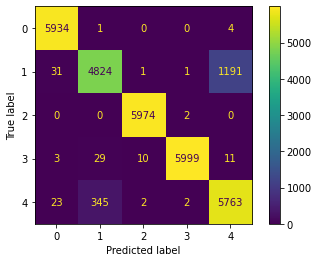

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_Eval, y_Eval)  

In [ ]:
from joblib import dump, load
dump(clf, 'rndfrst.joblib') 

['rndfrst.joblib']

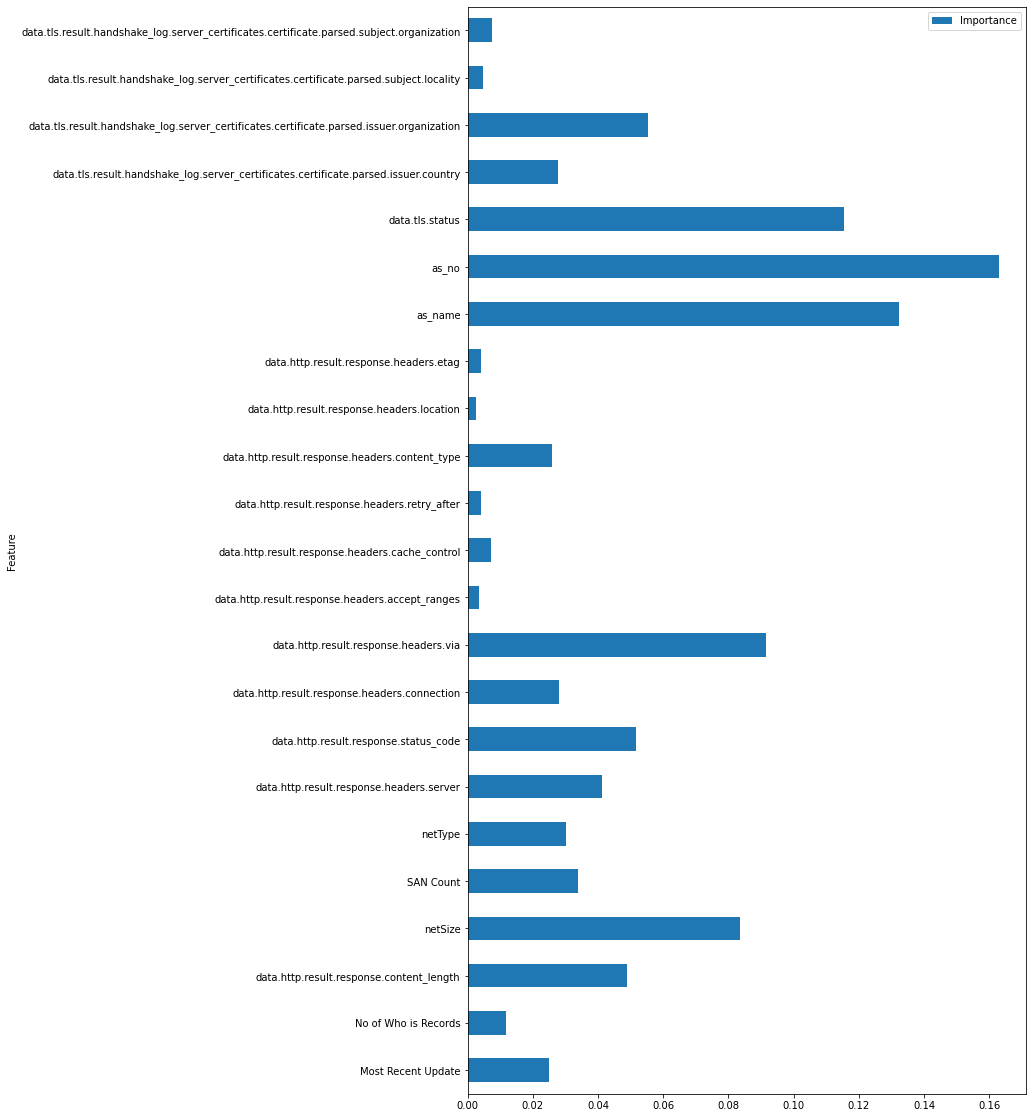

In [ ]:
featureImportance(clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


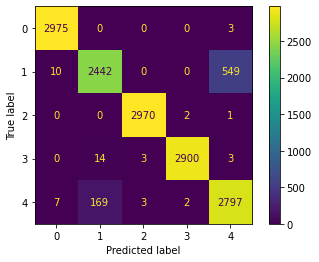

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


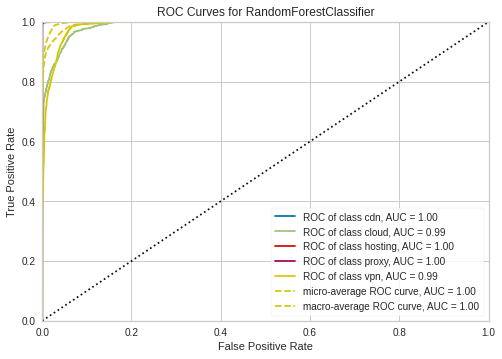

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf, classes=vendorEncodings)

visualizer.fit(X_train.values, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

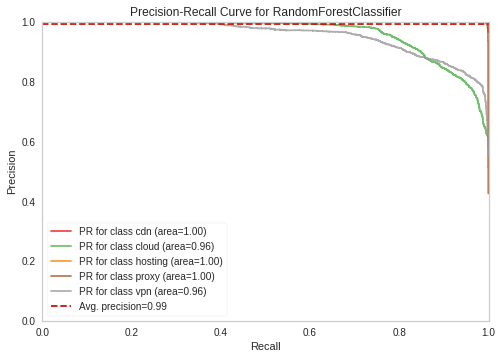

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(clf,per_class=True,cmap="Set1",micro=False,classes=vendorEncodings)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [ ]:
# from yellowbrick.classifier import ROCAUC
# visualizer = ROCAUC(neigh, classes=vendorEncodings)

# visualizer.fit(X_train.values, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))

0.9043097643097643


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2965    5    2    2    4]
 [  36 2653   22   20  270]
 [   6   26 2897   34   10]
 [   3   35   35 2830   17]
 [  17  745   54   78 2084]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2978
           1       0.77      0.88      0.82      3001
           2       0.96      0.97      0.97      2973
           3       0.95      0.97      0.96      2920
           4       0.87      0.70      0.78      2978

    accuracy                           0.90     14850
   macro avg       0.91      0.90      0.90     14850
weighted avg       0.91      0.90      0.90     14850

0.9043097643097643


In [ ]:
from joblib import dump, load
dump(neigh, 'neigh.joblib') 

['neigh.joblib']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


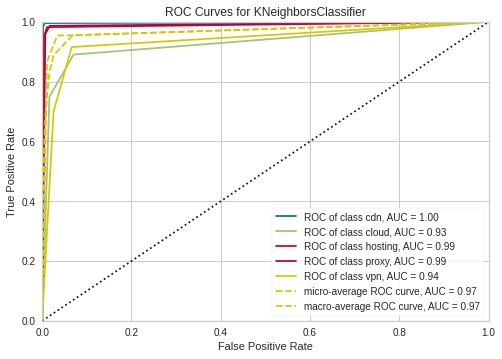

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(neigh, classes=vendorEncodings)

visualizer.fit(X_train.values, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

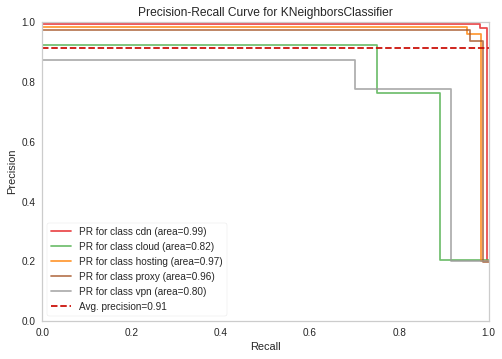

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(neigh,per_class=True,cmap="Set1",micro=False,classes=vendorEncodings)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [ ]:
# from sklearn.svm import SVC
# SVM_MODEL = SVC(gamma='auto')
# SVM_MODEL.fit(X_train, y_train)
# y_pred = SVM_MODEL.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))

In [ ]:
# importance = model.feature_importances_

# importancelist = []
# for i,v in enumerate(importance):
#  	importancelist.append([df.columns[i],v])

# importantdf = pd.DataFrame(importancelist)
# importantdf.columns = ['Feature','Importance']
# ax = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(10,20))

In [ ]:
vendorEncodings

array(['cdn', 'cloud', 'hosting', 'proxy', 'vpn'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=123,max_iter=200000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 937  149 1867   25    0]
 [ 108  743 1486   48  616]
 [   6    1 2957    9    0]
 [  23   84 1166 1637   10]
 [ 100  181 1456  636  605]]
              precision    recall  f1-score   support

           0       0.80      0.31      0.45      2978
           1       0.64      0.25      0.36      3001
           2       0.33      0.99      0.50      2973
           3       0.70      0.56      0.62      2920
           4       0.49      0.20      0.29      2978

    accuracy                           0.46     14850
   macro avg       0.59      0.46      0.44     14850
weighted avg       0.59      0.46      0.44     14850

0.4632323232323232


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1471   12 1469   25    1]
 [ 673  852 1291  182    3]
 [ 291    0 2672    9    1]
 [ 679   37  558 1643    3]
 [ 500  189 1058 1227    4]]
              precision    recall  f1-score   support

           0       0.41      0.49      0.45      2978
           1       0.78      0.28      0.42      3001
           2       0.38      0.90      0.53      2973
           3       0.53      0.56      0.55      2920
           4       0.33      0.00      0.00      2978

    accuracy                           0.45     14850
   macro avg       0.49      0.45      0.39     14850
weighted avg       0.49      0.45      0.39     14850

0.44727272727272727


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.5,
max_depth=2, random_state=0,).fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.9481481481481482


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2974    1    0    0    3]
 [   6 2482    0    0  513]
 [   0    0 2972    1    0]
 [   0   14    0 2903    3]
 [   7  220    0    2 2749]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2978
           1       0.91      0.83      0.87      3001
           2       1.00      1.00      1.00      2973
           3       1.00      0.99      1.00      2920
           4       0.84      0.92      0.88      2978

    accuracy                           0.95     14850
   macro avg       0.95      0.95      0.95     14850
weighted avg       0.95      0.95      0.95     14850

0.9481481481481482


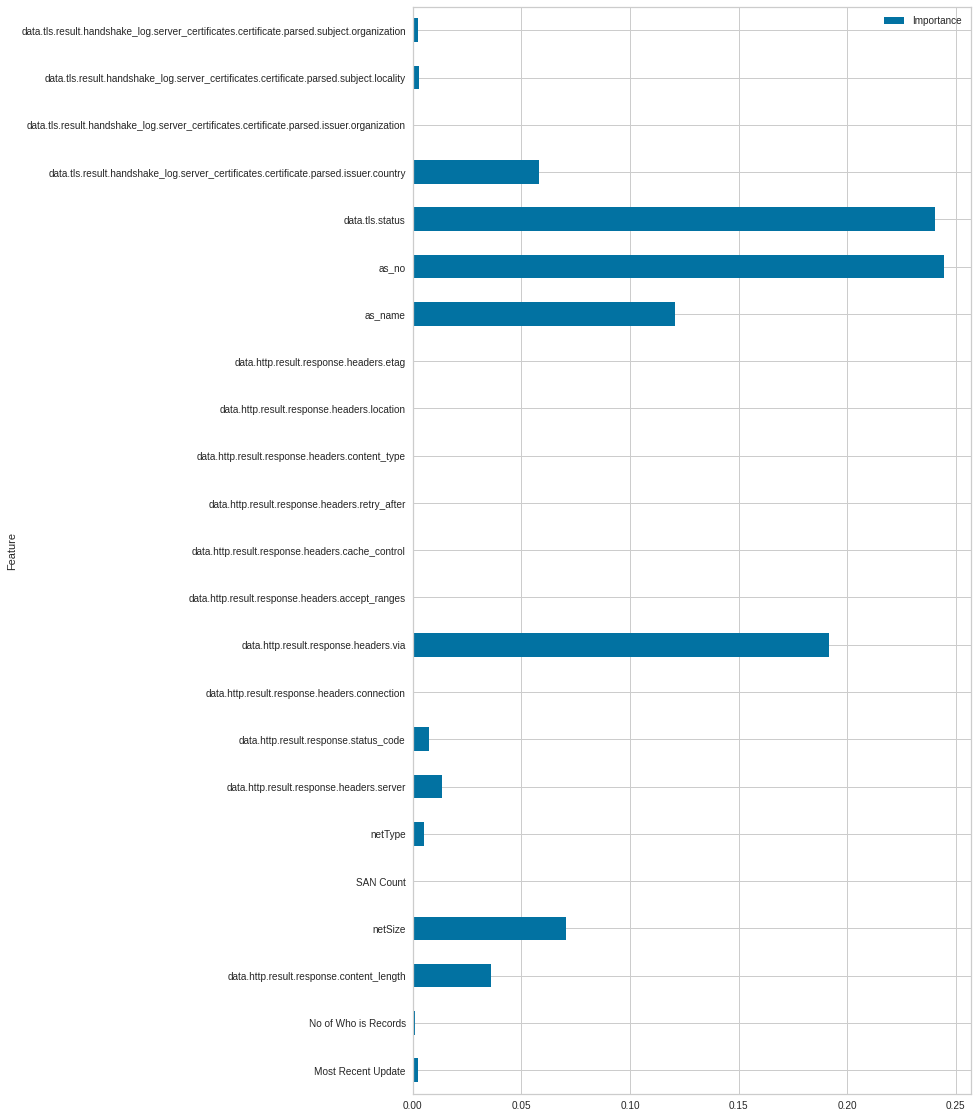

In [ ]:
featureImportance(clf)

In [ ]:
from joblib import dump, load
dump(clf, 'clf.joblib') 

['clf.joblib']

In [ ]:
from sklearn.svm import SVC
SVM_MODEL = SVC(gamma='auto')
SVM_MODEL.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2974    1    0    0    3]
 [   6 2482    0    0  513]
 [   0    0 2972    1    0]
 [   0   14    0 2903    3]
 [   7  220    0    2 2749]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2978
           1       0.91      0.83      0.87      3001
           2       1.00      1.00      1.00      2973
           3       1.00      0.99      1.00      2920
           4       0.84      0.92      0.88      2978

    accuracy                           0.95     14850
   macro avg       0.95      0.95      0.95     14850
weighted avg       0.95      0.95      0.95     14850

0.9481481481481482


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
              'max_depth':[10,11,12,15],
              'n_estimators':[200,500,1000],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf':  [1, 2, 4],
              'bootstrap': [True, False]
             }

rfc = RandomForestClassifier()
clf = RandomizedSearchCV(rfc, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

In [ ]:
clfresults = pd.DataFrame(clf.cv_results_)
clfresults.to_csv('RDFGridSearchResults.csv',index=False)

In [ ]:
clfresults

In [ ]:
clfresults

In [ ]:
!cp   /content/RDFGridSearchResults.csv /content/drive/MyDrive/RDFGridSearchResults.csv